# **Conagra Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
pd.set_option('display.max_columns', None)

In [2]:
# Check the Working Directory
os.getcwd()

'/Users/min/Desktop/2023 Spring Semester/BUAN 6337 Predictive Analytics for Data Science/Project/Data'

# Part I. Import Datasets

In [3]:
# Read 2018 Tablespreads Data
df2018 = pd.read_excel("IRI_POS_Tablespreads_2018.xlsx", sheet_name=0)
df2018 = df2018.rename(columns={"Product Description":"Product"}, errors="raise")

In [4]:
# Print out the First 5 Records
df2018.head(5)

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars
0,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,1.255982e+06,168416.455688,1.241794e+06,182993.872299,1.241794e+06,182993.872299,0.999727,1.011426,0.920339,0.999727,1.011426,0.920339,64.382639,5.720845,1.344519e+06,1.344519e+06,1.363962e+06,80268.496957,80268.496987,60436.436932
1,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,1.507009e+05,15573.717697,1.525283e+05,17263.338023,1.525283e+05,17263.338023,0.979287,0.988020,0.902127,0.979287,0.988020,0.902127,27.394093,1.846392,1.626122e+05,1.626122e+05,1.608675e+05,7179.481780,7179.481790,5407.131816
2,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX STICK...,70272006101,1.740030e+04,644.397026,1.736027e+04,717.499949,1.736027e+04,717.499949,0.998171,1.002306,0.898114,0.998171,1.002306,0.898114,6.917577,0.133754,1.776079e+04,1.776079e+04,1.778694e+04,316.976631,316.976622,257.755413
3,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD INDIVDL W...,29000008252,2.876466e+05,14088.692349,1.527090e+05,8311.540143,3.054180e+05,16623.080285,1.873893,1.883626,1.695076,0.936947,0.941813,0.847538,18.721969,1.431474,1.597783e+05,3.195565e+05,3.002505e+05,1242.285033,2484.570073,1484.776013
4,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009002,3.601990e+05,52619.025497,2.281632e+05,37591.803778,2.139030e+05,35242.316041,1.553378,1.578690,1.399747,1.656937,1.683936,1.493064,45.916324,4.987405,2.484898e+05,2.329592e+05,3.950170e+05,17265.155511,16186.083274,17801.030415


In [5]:
# Read 2019 Tablespreads Data and Print out the First 5 Records
df2019 = pd.read_excel("IRI_POS_Tablespreads_2019.xlsx", sheet_name=0)
df2019 = df2019.rename(columns={"Product Description":"Product"}, errors="raise")
df2019.head(5)

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars
0,Total US - Multi Outlet + Conv,Week Ending 01-13-19,BLUE BONNET RFG MARGARINE INDIVDL WRAP IN BOX ...,27000008223,7.515143e-01,NaN,1.002019e+00,NaN,1.002019e+00,NaN,0.750000,0.750000,NaN,0.750000,0.750000,NaN,0.000080,NaN,1.002019e+00,1.002019e+00,7.515143e-01,NaN,NaN,NaN
1,Total US - Multi Outlet + Conv,Week Ending 01-13-19,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,1.129866e+06,246554.506084,1.126835e+06,270796.477274,1.126835e+06,270796.477274,0.984823,1.002689,0.910479,0.984823,1.002689,0.910479,60.812676,6.584741,1.288850e+06,1.288850e+06,1.294620e+06,108781.919654,108781.919593,81799.892702
2,Total US - Multi Outlet + Conv,Week Ending 01-13-19,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,5.256669e+04,16777.871300,5.168104e+04,18250.074887,5.168104e+04,18250.074887,0.991612,1.017137,0.919332,0.991612,1.017137,0.919332,8.177748,1.429245,6.244920e+04,6.244920e+04,6.367720e+04,7481.923252,7481.923238,5667.367444
3,Total US - Multi Outlet + Conv,Week Ending 01-13-19,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX STICK...,70272006101,5.716157e+03,5532.182724,5.555355e+03,6155.530296,5.555355e+03,6155.530296,0.960503,1.028946,0.898734,0.960503,1.028946,0.898734,1.650172,1.730784,9.203346e+03,9.203346e+03,9.317513e+03,2507.538825,2507.538816,1930.827319
4,Total US - Multi Outlet + Conv,Week Ending 01-13-19,BLUE BONNET RFG VEGETABLE OIL SPREAD INDIVDL W...,29000008252,3.024809e+05,27541.931556,1.631550e+05,15854.874184,3.263100e+05,31709.748367,1.843601,1.853948,1.737127,0.921801,0.926974,0.868564,19.590581,1.634259,1.757999e+05,3.515999e+05,3.256630e+05,3209.935247,6419.870496,4359.838584


In [6]:
# Read 2020 Tablespreads Data and Print out the First 5 Records
df2020 = pd.read_excel("IRI_POS_Tablespreads_2020.xlsx", sheet_name=0)
df2020 = df2020.rename(columns={"Product Description":"Product"}, errors="raise")
df2020.head(5)

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars
0,Total US - Multi Outlet + Conv,Week Ending 01-12-20,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,1.181608e+06,145701.232504,1.152310e+06,166220.062140,1.152310e+06,166220.062140,1.006659,1.025426,0.876556,1.006659,1.025426,0.876556,47.863621,5.403421,1.257422e+06,1.257422e+06,1.286905e+06,61108.026615,61108.026191,40404.031725
1,Total US - Multi Outlet + Conv,Week Ending 01-12-20,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,5.263167e+04,7267.738055,5.055877e+04,8336.771839,5.055877e+04,8336.771839,1.017045,1.041000,0.871769,1.017045,1.041000,0.871769,8.906162,0.494859,5.459605e+04,5.459605e+04,5.716338e+04,4299.496015,4299.495996,2736.029155
2,Total US - Multi Outlet + Conv,Week Ending 01-12-20,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,2700710746763,1.790000e+00,NaN,2.000000e+00,NaN,2.000000e+00,NaN,0.895000,0.895000,NaN,0.895000,0.895000,NaN,0.004184,NaN,2.000000e+00,2.000000e+00,1.790000e+00,NaN,NaN,NaN
3,Total US - Multi Outlet + Conv,Week Ending 01-12-20,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX STICK...,70272006101,7.168975e+03,1805.701378,7.023087e+03,2014.694905,7.023087e+03,2014.694905,0.993018,1.020773,0.896265,0.993018,1.020773,0.896265,2.486694,0.130828,7.767225e+03,7.767225e+03,8.041101e+03,1270.557377,1270.557365,933.575722
4,Total US - Multi Outlet + Conv,Week Ending 01-12-20,BLUE BONNET RFG VEGETABLE OIL SPREAD INDIVDL W...,29000008252,8.555770e+04,2218.675016,4.328042e+04,1119.400723,8.656084e+04,2238.801445,1.976953,1.976822,1.982020,0.988477,0.988411,0.991010,4.195265,0.017958,4.368885e+04,8.737770e+04,8.645315e+04,710.971111,1421.942149,1323.221067


In [7]:
# Read 2021 Tablespreads Data and Print out the First 5 Records
df2021 = pd.read_excel("IRI_POS_Tablespreads_2021.xlsx", sheet_name=0)
df2021 = df2021.rename(columns={"Product Description":"Product"}, errors="raise")
df2021.head(5)

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars
0,Total US - Multi Outlet + Conv,Week Ending 01-10-21,BLUE BONNET RFG MARGARINE INDIVDL WRAP IN BOX ...,27000008223,7.539653e-01,NaN,1.005287e+00,NaN,1.005287e+00,NaN,0.750000,0.750000,NaN,0.750000,0.750000,NaN,0.000139,NaN,1.005287e+00,1.005287e+00,7.539653e-01,NaN,NaN,NaN
1,Total US - Multi Outlet + Conv,Week Ending 01-10-21,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,1.114832e+06,122990.514879,1.117644e+06,128734.172921,1.117644e+06,128734.172921,0.993136,0.997484,0.955384,0.993136,0.997484,0.955384,48.874694,2.963641,1.205004e+06,1.205004e+06,1.208636e+06,41374.167620,41374.167609,29185.952492
2,Total US - Multi Outlet + Conv,Week Ending 01-10-21,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,5.252021e+04,14501.189953,5.170812e+04,16051.426469,5.170812e+04,16051.426469,0.989106,1.015705,0.903421,0.989106,1.015705,0.903421,6.528271,2.479148,6.126943e+04,6.126943e+04,6.240235e+04,6490.112150,6490.112150,4619.048970
3,Total US - Multi Outlet + Conv,Week Ending 01-10-21,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX STICK...,70272006101,6.839194e+03,38.298767,6.732403e+03,37.062117,6.732403e+03,37.062117,1.015958,1.015862,1.033367,1.015958,1.015862,1.033367,1.888766,0.020575,6.761936e+03,6.761936e+03,6.871077e+03,7.528656,7.528656,6.415915
4,Total US - Multi Outlet + Conv,Week Ending 01-10-21,BLUE BONNET RFG VEGETABLE OIL SPREAD INDIVDL W...,29000008252,1.079437e+05,3127.445362,5.487284e+04,1632.468668,1.097457e+05,3264.937335,1.965677,1.967161,1.915777,0.982838,0.983581,0.957888,4.160347,0.072054,5.600282e+04,1.120056e+05,1.102381e+05,502.483863,1004.967726,833.097306


In [8]:
# Read 2022 Tablespreads Data and Print out the First 5 Records
df2022 = pd.read_excel("IRI_POS_Tablespreads_2022.xlsx", sheet_name=0)
df2022.head(5)

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars
0,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,1.088910e+06,146880.565443,937262.522463,131813.603009,937262.522463,131813.603009,1.155943,1.161799,1.114305,1.155943,1.161799,1.114305,43.706176,4.402609,1.009909e+06,1.009909e+06,1.180254e+06,59166.887553,59166.887620,55536.766682
1,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,4.490108e+04,10248.728577,38808.407025,8936.592409,38808.407025,8936.592409,1.155091,1.156994,1.146827,1.155091,1.156994,1.146827,5.492362,1.014832,4.370129e+04,4.370129e+04,5.118342e+04,4043.705718,4043.705725,3966.379893
2,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD INDIVDL W...,29000008252,5.817064e+04,3101.773105,23261.694744,1555.268466,46523.389488,3110.536932,2.468973,2.500705,1.994365,1.234487,1.250353,0.997183,2.050543,0.068772,2.419815e+04,4.839631e+04,6.027251e+04,618.808218,1237.616440,999.899905
3,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009002,2.324966e+05,12934.069323,117940.681316,7060.648479,110569.388734,6619.357949,1.963425,1.971301,1.831853,2.094320,2.102721,1.953976,26.319175,1.711830,1.223989e+05,1.147489e+05,2.422413e+05,2602.458243,2439.804604,3189.355727
4,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009301,3.622984e+04,282.533668,18824.140361,152.200069,17647.631589,142.687565,1.924100,1.924648,1.856331,2.052373,2.052957,1.980086,6.243850,0.063546,1.896075e+04,1.777571e+04,3.648962e+04,15.587367,14.613157,22.748004


In [9]:
# Read Tablespreads Attribute Data and Print out the First 5 Records
df_attr = pd.read_excel("IRI_POS_Tablespreads_Product Attribute File.xlsx", sheet_name=0)
df_attr.head(5)

,Geography,Time,Product,UPC 13 digit,CAG Major Brand Value,CAG Manufacturer Value,Sub-Category Name,CAG Category Value,CAG Count Value,CAG Ounces Value,CAG Form Value,Form,CAG Tier Value
0,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET - 0027000008371,27000008371,BLUE BONNET,CONAGRA BRANDS,NaN,TABLESPREADS,1 CT,15 OZ,TUBS,NaN,VALUE
1,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET RFG MARGARINE INDIVDL WRAP IN BOX ...,27000008223,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,4 CT,16 OZ,STICKS,QUARTER,VALUE
2,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,27000008361,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1 CT,16 OZ,STICKS,SPREAD,VALUE
3,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1 CT,16 OZ,ALL OTHER FORM,SPREAD,VALUE
4,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1 CT,16 OZ,STICKS,SPREAD,VALUE


In [10]:
# Read Five-Year Cooking & Salad Oils Data and Print out the First 5 Records
df_oil = pd.read_excel("IRI_POS_Cooking & Salad Oils_2018-2022.xlsx", sheet_name=0)
df_oil.head(5)

,Geography,Time,Product,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars
0,Total US - Multi Outlet + Conv,Week Ending 01-14-18,CAPULLO COOKING & SALAD OILS,3.182947e+04,12021.372821,14750.303179,7659.409859,2.950061e+04,15318.819718,1.956778,2.157886,1.569491,0.978389,1.078943,0.784745,6.472209,0.095585,15158.981516,3.031796e+04,3.275406e+04,7250.731522,14501.462990,11096.783942
1,Total US - Multi Outlet + Conv,Week Ending 01-14-18,MAZOLA COOKING & SALAD OILS,3.308206e+06,907463.068657,510199.599648,189118.870703,2.707245e+06,816232.789170,6.028253,6.484140,4.798374,1.196451,1.221982,1.111770,74.965862,16.769991,588893.859675,3.038405e+06,3.754417e+06,110424.610676,485072.264692,461252.235344
2,Total US - Multi Outlet + Conv,Week Ending 01-14-18,REAL GUYANA COOKING & SALAD OILS,9.732541e+01,16.044796,18.376287,3.445554,1.378222e+01,2.584165,5.195263,5.296250,4.656667,6.927018,7.061667,6.208889,0.010452,0.002035,19.754509,1.481588e+01,1.055884e+02,2.067332,1.550499,7.781783
3,Total US - Multi Outlet + Conv,Week Ending 01-14-18,ROLAND COOKING & SALAD OILS,1.121653e+04,541.614341,932.024445,70.384758,2.469026e+02,32.934224,11.729888,12.034592,7.695052,42.017879,45.428989,16.445335,2.331571,0.104546,982.605435,2.706488e+02,1.167105e+04,19.803769,9.187955,87.100644
4,Total US - Multi Outlet + Conv,Week Ending 01-14-18,GOOD AS GOLD COOKING & SALAD OILS,5.107337e+01,0.020000,22.009945,0.010000,6.602983e+01,0.030000,2.320322,2.320468,2.000000,0.773441,0.773489,0.666667,0.002537,0.000069,22.019945,6.605983e+01,5.109337e+01,0.000000,0.000000,0.000000


In [11]:
# Read Cooking & Salad Oils Attribute Data and Print out the First 5 Records
df_oil_attr = pd.read_excel("IRI_POS_Cooking & Salad Oils_Product Attribute File.xlsx", sheet_name=0)
df_oil_attr.head()

,Brand,Manufacturer,Category
0,4TH & HEART COOKING & SALAD OILS,4TH & HEART,COOKING & SALAD OILS
1,AUTHENTIC MENU COOKING & SALAD OILS,A&M GOURMET FOODS INC,COOKING & SALAD OILS
2,CAPULLO COOKING & SALAD OILS,ACH FOOD CO,COOKING & SALAD OILS
3,MAZOLA COOKING & SALAD OILS,ACH FOOD CO,COOKING & SALAD OILS
4,EL CAMPESINO COOKING & SALAD OILS,AC FOODS WHLSL,COOKING & SALAD OILS


In [12]:
# Read Five-Year Cooking Sprays Data and Print out the First 5 Records
df_spray = pd.read_excel("IRI_POS_Cooking Sprays_2018-2022.xlsx", sheet_name=0)
df_spray.head(5)

,Geography,Time,Product,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars
0,Total US - Multi Outlet + Conv,Week Ending 01-14-18,WINONA PURE COOKING SPRAYS,24650.088234,51.080000,7697.139651,18.000000,2405.356141,5.625000,3.201649,3.202500,2.837778,10.245276,10.247999,9.080889,14.283109,0.016614,7708.379652,2408.868641,24685.399233,6.760000,2.112500,15.769001
1,Total US - Multi Outlet + Conv,Week Ending 01-14-18,MAZOLA COOKING SPRAYS,38022.422834,744.390850,17155.765767,325.989418,5361.176802,101.871693,2.217558,2.216306,2.283482,7.096187,7.092178,7.307141,19.661145,0.184580,17335.260760,5417.268987,38468.978145,146.494425,45.779508,297.835539
2,Total US - Multi Outlet + Conv,Week Ending 01-14-18,FRATELLI MANTOVA COOKING SPRAYS,5019.152981,639.542858,660.018313,100.416811,338.733227,53.351452,7.441392,7.604566,6.368882,14.432331,14.817421,11.987356,1.775775,0.121402,717.560744,369.305520,5403.805097,42.874380,22.779158,254.890742
3,Total US - Multi Outlet + Conv,Week Ending 01-14-18,GRAND AROMA COOKING SPRAYS,2504.180539,294.946600,334.698915,47.186823,167.349457,23.593412,7.329750,7.481890,6.250614,14.659501,14.963780,12.501227,0.807582,0.096137,369.936999,184.968499,2742.948571,11.948739,5.974370,56.178569
4,Total US - Multi Outlet + Conv,Week Ending 01-14-18,GLICKS COOKING SPRAYS,86.360844,NaN,27.374427,NaN,10.193628,NaN,3.154800,3.154800,NaN,8.472042,8.472042,NaN,0.050300,NaN,27.374427,10.193628,86.360844,NaN,NaN,NaN


In [13]:
# Read Cooking Spray Data and Print out the First 5 Records
df_spray_attr = pd.read_excel("IRI_POS_Cooking Spray_Product Attribute File.xlsx", sheet_name=0)
df_spray_attr.head()

,Brand,Manufacturer,Category
0,NATURALLY COOKING SPRAYS,CONAGRA BRANDS,COOKING SPRAYS
1,PAM COOKING SPRAYS,CONAGRA BRANDS,COOKING SPRAYS
2,SMART BALANCE COOKING SPRAYS,CONAGRA BRANDS,COOKING SPRAYS
3,WESCOAT COOKING SPRAYS,CONAGRA BRANDS,COOKING SPRAYS
4,PRIVATE LABEL COOKING SPRAYS,PRIVATE LABEL,COOKING SPRAYS


In [14]:
# Read Panel HH Buying Data and Print out the First 5 Records
df_buyer = pd.read_excel("IRI_Panel_HH Buying.xlsx", sheet_name=0)
df_buyer.head(5)

,Geography,Product,52 Weeks Ending Jan-29-2023 Standard Hierarchy Level,52 Weeks Ending Jan-29-2023 % HH Buying,52 Weeks Ending Jan-29-2023 % HHs Buying 1x,52 Weeks Ending Jan-29-2023 % HHs Buying 2x+,52 Weeks Ending Jan-30-2022 % HH Buying,52 Weeks Ending Jan-30-2022 % HHs Buying 1x,52 Weeks Ending Jan-30-2022 % HHs Buying 2x+,52 Weeks Ending Jan-31-2021 % HH Buying,52 Weeks Ending Jan-31-2021 % HHs Buying 1x,52 Weeks Ending Jan-31-2021 % HHs Buying 2x+
0,Total US - All Outlets,COOKING SPRAYS INGREDIENTS & CONDIMENTS,CATEGORY,46.121537,21.823292,24.298244,48.539399,22.614691,25.924707,53.350476,23.173038,30.177438
1,Total US - All Outlets,TABLESPREADS INGREDIENTS & CONDIMENTS,CATEGORY,90.842243,8.447243,82.395000,91.396629,7.907971,83.488658,93.407986,6.654306,86.753680
2,Total US - All Outlets,COOKING & SALAD OILS,SubCategory,71.892043,17.577247,54.314796,73.827882,17.747606,56.080276,78.483854,17.256968,61.226886
3,Total US - All Outlets,RFG BUTTER,SubCategory,73.812465,13.096842,60.715623,74.597623,12.550889,62.046734,77.123258,11.632252,65.491005
4,Total US - All Outlets,RFG BUTTER BLENDS,SubCategory,18.809213,7.072157,11.737056,18.077305,6.784780,11.292525,18.005555,6.504649,11.500906


In [15]:
df_buyer_index = pd.read_excel("IRI_Panel_Buyer Distribution and Index.xlsx", sheet_name=0)
df_buyer_index.head(5)

,Geography,Time,Target Group 1,HH Demo Summary,COOKING & SALAD OILS Buyer Distribution,COOKING & SALAD OILS Buyer Index,CAPULLO-COOKING & SALAD OILS Buyer Distribution,CAPULLO-COOKING & SALAD OILS Buyer Index,MAZOLA-COOKING & SALAD OILS Buyer Distribution,MAZOLA-COOKING & SALAD OILS Buyer Index,VITA COCO-COOKING & SALAD OILS Buyer Distribution,VITA COCO-COOKING & SALAD OILS Buyer Index,CRISCO-COOKING & SALAD OILS Buyer Distribution,CRISCO-COOKING & SALAD OILS Buyer Index,BETTERBODY FOODS-COOKING & SALAD OILS Buyer Distribution,BETTERBODY FOODS-COOKING & SALAD OILS Buyer Index,CELLI-COOKING & SALAD OILS Buyer Distribution,CELLI-COOKING & SALAD OILS Buyer Index,IBERIA-COOKING & SALAD OILS Buyer Distribution,IBERIA-COOKING & SALAD OILS Buyer Index,CHOSEN FOODS-COOKING & SALAD OILS Buyer Distribution,CHOSEN FOODS-COOKING & SALAD OILS Buyer Index,CALIFORNIA OLIVE RANCH-COOKING & SALAD OILS Buyer Distribution,CALIFORNIA OLIVE RANCH-COOKING & SALAD OILS Buyer Index,CARRINGTON FARMS-COOKING & SALAD OILS Buyer Distribution,CARRINGTON FARMS-COOKING & SALAD OILS Buyer Index,LA SPAGNOLA-COOKING & SALAD OILS Buyer Distribution,LA SPAGNOLA-COOKING & SALAD OILS Buyer Index,CHEFS LIFE-COOKING & SALAD OILS Buyer Distribution,CHEFS LIFE-COOKING & SALAD OILS Buyer Index,SMART BALANCE-COOKING & SALAD OILS Buyer Distribution,SMART BALANCE-COOKING & SALAD OILS Buyer Index,PALERMO-COOKING & SALAD OILS Buyer Distribution,PALERMO-COOKING & SALAD OILS Buyer Index,DR BRONNERS-COOKING & SALAD OILS Buyer Distribution,DR BRONNERS-COOKING & SALAD OILS Buyer Index,GOYA-COOKING & SALAD OILS Buyer Distribution,GOYA-COOKING & SALAD OILS Buyer Index,HARVEST BRANDS-COOKING & SALAD OILS Buyer Distribution,HARVEST BRANDS-COOKING & SALAD OILS Buyer Index,1 2 3-COOKING & SALAD OILS Buyer Distribution,1 2 3-COOKING & SALAD OILS Buyer Index,BENISSIMO-COOKING & SALAD OILS Buyer Distribution,BENISSIMO-COOKING & SALAD OILS Buyer Index,PLANTERS-COOKING & SALAD OILS Buyer Distribution,PLANTERS-COOKING & SALAD OILS Buyer Index,LONG LIFE-COOKING & SALAD OILS Buyer Distribution,LONG LIFE-COOKING & SALAD OILS Buyer Index,PRIMAL KITCHEN-COOKING & SALAD OILS Buyer Distribution,PRIMAL KITCHEN-COOKING & SALAD OILS Buyer Index,GRAPEOLA-COOKING & SALAD OILS Buyer Distribution,GRAPEOLA-COOKING & SALAD OILS Buyer Index,LA TOURANGELLE-COOKING & SALAD OILS Buyer Distribution,LA TOURANGELLE-COOKING & SALAD OILS Buyer Index,LILY OF THE DESERT-COOKING & SALAD OILS Buyer Distribution,LILY OF THE DESERT-COOKING & SALAD OILS Buyer Index,NUTIVA-COOKING & SALAD OILS Buyer Distribution,NUTIVA-COOKING & SALAD OILS Buyer Index,POMPEIAN-COOKING & SALAD OILS Buyer Distribution,POMPEIAN-COOKING & SALAD OILS Buyer Index,PRIVATE LABEL-COOKING & SALAD OILS Buyer Distribution,PRIVATE LABEL-COOKING & SALAD OILS Buyer Index,NUTRIOLI-COOKING & SALAD OILS Buyer Distribution,NUTRIOLI-COOKING & SALAD OILS Buyer Index,WESSON-COOKING & SALAD OILS Buyer Distribution,WESSON-COOKING & SALAD OILS Buyer Index,OLIVARI-COOKING & SALAD OILS Buyer Distribution,OLIVARI-COOKING & SALAD OILS Buyer Index,SPORTS RESEARCH-COOKING & SALAD OILS Buyer Distribution,SPORTS RESEARCH-COOKING & SALAD OILS Buyer Index,GOLDEN CHEF-COOKING & SALAD OILS Buyer Distribution,GOLDEN CHEF-COOKING & SALAD OILS Buyer Index,VICTORY-COOKING & SALAD OILS Buyer Distribution,VICTORY-COOKING & SALAD OILS Buyer Index,HOLLYWOOD-COOKING & SALAD OILS Buyer Distribution,HOLLYWOOD-COOKING & SALAD OILS Buyer Index,SPECTRUM-COOKING & SALAD OILS Buyer Distribution,SPECTRUM-COOKING & SALAD OILS Buyer Index,BUTCHER BOY-COOKING & SALAD OILS Buyer Distribution,BUTCHER BOY-COOKING & SALAD OILS Buyer Index,PAMPA-COOKING & SALAD OILS Buyer Distribution,PAMPA-COOKING & SALAD OILS Buyer Index,OTTAVIO-COOKING & SALAD OILS Buyer Distribution,OTTAVIO-COOKING & SALAD OILS Buyer Index,LOU ANA-COOKING & SALAD OILS Buyer Distribution,LOU ANA-COOKING & SALAD OILS Buyer Index,VIVA NATURALS-COOKING & SALAD OILS Buyer Distribution,VIVA NATURALS-COOKING & SALAD OILS Buyer Index,INT

# Part II. Data Cleaning & Univariate Analysis

## 1. Tablespreads Data

### Combine Five Years' Tablespreads Data

In [16]:
df_tablespreads0 = pd.concat([df2018, df2019, df2020, df2021, df2022], ignore_index=True)

In [17]:
df_tablespreads0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316655 entries, 0 to 1316654
Data columns (total 24 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Geography                            1316655 non-null  object 
 1   Time                                 1316655 non-null  object 
 2   Product                              1316655 non-null  object 
 3   UPC 13 digit                         1316655 non-null  int64  
 4   Dollar Sales No Merch                1277069 non-null  float64
 5   Dollar Sales Any Merch               789822 non-null   float64
 6   Unit Sales No Merch                  1277069 non-null  float64
 7   Unit Sales Any Merch                 789822 non-null   float64
 8   Volume Sales No Merch                1277069 non-null  float64
 9   Volume Sales Any Merch               789822 non-null   float64
 10  Price per Unit                       1316655 non-null  float64
 11

#### Merge Five-Year Tablespreads Data with Tablespreads Attribute Data

In [18]:
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)
    
df_tablespreads0 = pd.merge(df_tablespreads0, df_attr, how='left', on = 'UPC 13 digit', suffixes = ('', '_y'))
drop_y(df_tablespreads0)

In [19]:
df_tablespreads0.head(5)

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,CAG Major Brand Value,CAG Manufacturer Value,Sub-Category Name,CAG Category Value,CAG Count Value,CAG Ounces Value,CAG Form Value,Form,CAG Tier Value
0,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,1.255982e+06,168416.455688,1.241794e+06,182993.872299,1.241794e+06,182993.872299,0.999727,1.011426,0.920339,0.999727,1.011426,0.920339,64.382639,5.720845,1.344519e+06,1.344519e+06,1.363962e+06,80268.496957,80268.496987,60436.436932,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1 CT,16 OZ,ALL OTHER FORM,SPREAD,VALUE
1,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,1.507009e+05,15573.717697,1.525283e+05,17263.338023,1.525283e+05,17263.338023,0.979287,0.988020,0.902127,0.979287,0.988020,0.902127,27.394093,1.846392,1.626122e+05,1.626122e+05,1.608675e+05,7179.481780,7179.481790,5407.131816,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1 CT,16 OZ,STICKS,SPREAD,VALUE
2,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX STICK...,70272006101,1.740030e+04,644.397026,1.736027e+04,717.499949,1.736027e+04,717.499949,0.998171,1.002306,0.898114,0.998171,1.002306,0.898114,6.917577,0.133754,1.776079e+04,1.776079e+04,1.778694e+04,316.976631,316.976622,257.755413,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,4 CT,16 OZ,STICKS,STICK,VALUE
3,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD INDIVDL W...,29000008252,2.876466e+05,14088.692349,1.527090e+05,8311.540143,3.054180e+05,16623.080285,1.873893,1.883626,1.695076,0.936947,0.941813,0.847538,18.721969,1.431474,1.597783e+05,3.195565e+05,3.002505e+05,1242.285033,2484.570073,1484.776013,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,8 CT,32 OZ,STICKS,STICK,VALUE
4,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009002,3.601990e+05,52619.025497,2.281632e+05,37591.803778,2.139030e+05,35242.316041,1.553378,1.578690,1.399747,1.656937,1.683936,1.493064,45.916324,4.987405,2.484898e+05,2.329592e+05,3.950170e+05,17265.155511,16186.083274,17801.030415,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1 CT,15 OZ,TUBS,SPREAD,VALUE


#### Checking Missing Values

In [20]:
cols = df_tablespreads0.columns[6:]
colors = ['#000099', '#ffff00'] #yellow is missing, blue is not missing

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 [Text(0.5, 0, 'Unit Sales No Merch'),
  Text(1.5, 0, 'Unit Sales Any Merch'),
  Text(2.5, 0, 'Volume Sales No Merch'),
  Text(3.5, 0, 'Volume Sales Any Merch'),
  Text(4.5, 0, 'Price per Unit'),
  Text(5.5, 0, 'Price per Unit No Merch'),
  Text(6.5, 0, 'Price per Unit Any Merch'),
  Text(7.5, 0, 'Price per Volume'),
  Text(8.5, 0, 'Price per Volume No Merch'),
  Text(9.5, 0, 'Price per Volume Any Merch'),
  Text(10.5, 0, 'ACV Weighted Distribution No Merch'),
  Text(11.5, 0, 'ACV Weighted Distribution Any Merch'),
  Text(12.5, 0, 'Base Unit Sales'),
  Text(13.5, 0, 'Base Volume Sales'),
  Text(14.5, 0, 'Base Dollar Sales'),
  Text(15.5, 0, 'Incremental Units'),
  Text(16.5, 0, 'Incremental Volume'),
  Text(17.5, 0, 'Incremental Dollars'),
  Text(18.5, 0, 'CAG Major Brand Value'),
  Text(19.5, 0, 'CAG

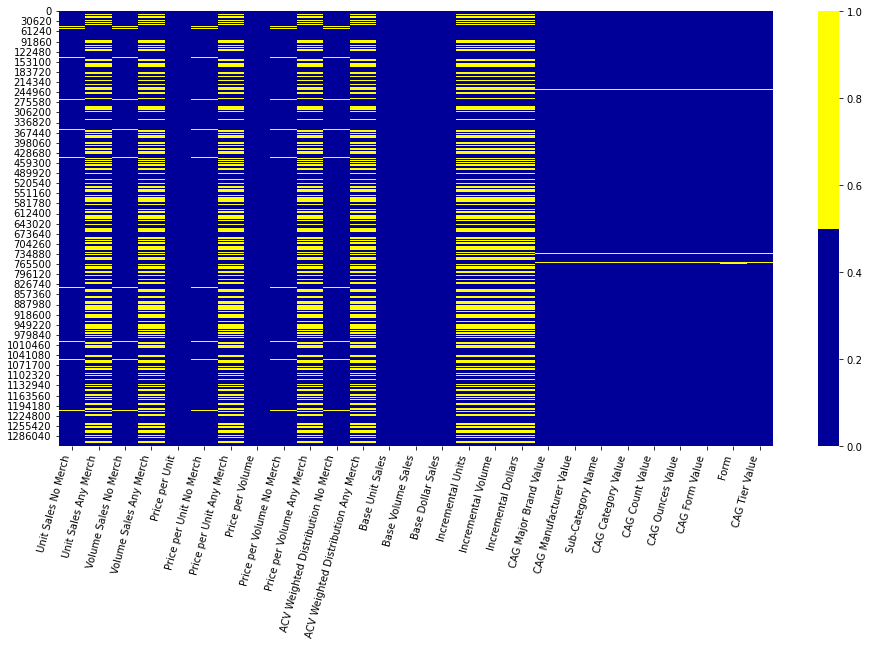

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_tablespreads0[cols].isna(), cmap = sns.color_palette(colors), ax = ax)
plt.xticks(rotation = 75, ha='right')

In [22]:
# The Percentage of Missing Values
percent_missing = df_tablespreads0.isnull().sum() * 100 / len(df_tablespreads0)
missing_value_df_tablespreads = pd.DataFrame({'number of missing': df_tablespreads0.isnull().sum()[2],
                                            'percent_missing': percent_missing})
missing_value_df_tablespreads

,number of missing,percent_missing
Geography,0,0.000000
Time,0,0.000000
Product,0,0.000000
UPC 13 digit,0,0.000000
Dollar Sales No Merch,0,3.006558
Dollar Sales Any Merch,0,40.012987
Unit Sales No Merch,0,3.006558
Unit Sales Any Merch,0,40.012987
Volume Sales No Merch,0,3.006558
Volume Sales Any Merch,0,40.012987


#### Generate Promotion Variable

In [23]:
df_tablespreads0['Promotion'] =  df_tablespreads0['Dollar Sales Any Merch'].apply(lambda x: 1 if x > 0 else 0)

#### Data Imputation
- Fill the missing values for `Dollar Sales No Merch`, `Unit Sales No Merch`, `Volume Sales No Merch`, `Price per Unit No Merch`, `Price per Volume No Merch`, `ACV Weighted Distribution No Merch` with 0.
- Fill the missing values for `Dollar Sales Any Merch`, `Unit Sales Any Merch`, `Volume Sales Any Merch`,  `ACV Weighted Distribution Any Merch`, `Incremental Units`, `Incremental Volume`, and `Incremental Dollars` with 0.
- Fill the missing values for `Price per Unit Any Merch ` and `Price per Volume Any Merch` with the according values in the variables for Any Merch.

In [24]:
col_list1 = ['Dollar Sales No Merch', 'Unit Sales No Merch', 'Volume Sales No Merch', 'Price per Unit No Merch', 'Price per Volume No Merch', 'ACV Weighted Distribution No Merch']
  
for col in col_list1:
    df_tablespreads0[col].fillna(0,inplace=True)

In [25]:
col_list2 = ['Dollar Sales Any Merch', 'Unit Sales Any Merch', 'Volume Sales Any Merch', 'ACV Weighted Distribution Any Merch', 'Incremental Units', 'Incremental Volume', 'Incremental Dollars']
  
for col in col_list2:
    df_tablespreads0[col].fillna(0,inplace=True)

In [26]:
df_tablespreads0['Price per Unit Any Merch'] = df_tablespreads0['Price per Unit Any Merch'].fillna(df_tablespreads0['Price per Unit No Merch'])
    
df_tablespreads0['Price per Volume Any Merch'] = df_tablespreads0['Price per Volume Any Merch'].fillna(df_tablespreads0['Price per Volume No Merch'])

In [27]:
df_tablespreads0[df_tablespreads0['CAG Manufacturer Value'].isnull() == True]

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,CAG Major Brand Value,CAG Manufacturer Value,Sub-Category Name,CAG Category Value,CAG Count Value,CAG Ounces Value,CAG Form Value,Form,CAG Tier Value,Promotion
696,Total US - Multi Outlet + Conv,Week Ending 01-14-18,CHEF SHAMY RFG PRMSN CHS & BSL GRLC BUTTER PLA...,641548550062,48243.8900,27608.17,6903.00,3961.0,4314.37500,2475.625,6.981964,6.988829,6.970000,11.171143,11.182127,11.152000,0.991234,0.503225,9374.636579,5859.147854,65493.035879,1489.363421,930.852146,10359.024121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
704,Total US - Multi Outlet + Conv,Week Ending 01-14-18,CHEF SHAMY GOURMET RFG HONEY BUTTER PLASTIC TU...,641548550121,14178.2100,2969.22,2033.00,426.0,2033.00000,426.000,6.973335,6.974033,6.970000,6.973335,6.974033,6.970000,1.008940,0.208714,2301.960000,2301.959999,16072.225790,157.040000,157.040001,1075.204210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1967,Total US - Multi Outlet + Conv,Week Ending 01-21-18,CHEF SHAMY RFG PRMSN CHS & BSL GRLC BUTTER PLA...,641548550062,51288.5300,22845.78,7356.00,3278.0,4597.50000,2048.750,6.971442,6.972340,6.969426,11.154307,11.155743,11.151082,1.094765,0.542967,9543.489053,5964.680663,66542.288694,1090.510947,681.569337,7592.021306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1975,Total US - Multi Outlet + Conv,Week Ending 01-21-18,CHEF SHAMY GOURMET RFG HONEY BUTTER PLASTIC TU...,641548550121,11146.9600,6926.43,1599.00,994.0,1599.00000,994.000,6.970069,6.971207,6.968239,6.970069,6.971207,6.968239,0.802734,0.470534,2104.426078,2104.426082,14670.450430,488.573922,488.573918,3402.939570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3246,Total US - Multi Outlet + Conv,Week Ending 01-28-18,CHEF SHAMY RFG PRMSN CHS & BSL GRLC BUTTER PLA...,641548550062,64221.3391,11298.09,9185.03,1659.0,5740.64375,1036.875,6.964148,6.991957,6.810181,11.142637,11.187132,10.896289,1.279986,0.268991,10317.464983,6448.415611,72131.019129,526.565017,329.103139,3388.409971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068380,West - IRI Standard - Multi Outlet + Conv,Week Ending 12-19-21,CHEF SHAMY GOURMET RFG HONEY BUTTER PLASTIC TU...,641548550121,3401.8100,9944.71,491.00,1444.0,491.00000,1444.000,6.897426,6.928330,6.886918,6.897426,6.928330,6.886918,1.053070,2.343341,1505.860738,1505.860736,10393.531919,429.139262,429.139264,2952.988081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1068798,West - IRI Standard - Multi Outlet + Conv,Week Ending 12-26-21,CHEF SHAMY RFG PRMSN CHS & BSL GRLC BUTTER PLA...,641548550062,12571.0700,32244.97,1808.00,4648.0,1130.00000,2905.000,6.941766,6.953025,6.937386,11.106825,11.124841,11.099818,1.210705,2.201468,5148.060919,3217.538075,35743.124404,1307.939081,817.461925,9072.915596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1068804,West - IRI Standard - Multi Outlet + Conv,Week Ending 12-26-21,CHEF SHAMY GOURMET RFG HONEY BUTTER PLASTIC TU...,641548550121,3503.1000,10523.68,507.00,1528.0,507.00000,1528.000,6.892767,6.909467,6.887225,6.892767,6.909467,6.887225,1.148946,2.263228,1516.013889,1516.013887,10458.320527,518.986111,518.986113,3568.459473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1069224,West - IRI Standard - Multi Outlet + Conv,Week Ending 01-02-22,CHEF SHAMY RFG PRMSN CHS & BSL GRLC BUTTER PLA...,641548550062,6228.8400,15915.25,897.00,2293.0,560.62500,1433.125,6.941721,6.944080,6.940798,11.106754,11.110528,11.105277,0.979326,1.710353,3117.159569,1948.224730,21638.929697,72.840431,45.525270,505.1603

**CHEF SHAMY is a butter brand but has no records in the Attribute file, so we manually fill in related columns for the records**

In [28]:
df_tablespreads0['CAG Major Brand Value'] = df_tablespreads0['CAG Major Brand Value'].fillna('CHEF SHAMY')
df_tablespreads0['CAG Manufacturer Value'] = df_tablespreads0['CAG Manufacturer Value'].fillna('CHEF SHAMY INC.')
df_tablespreads0['CAG Category Value'] = df_tablespreads0['CAG Category Value'].fillna('TABLESPREADS')
df_tablespreads0['Sub-Category Name'] = df_tablespreads0['Sub-Category Name'].fillna('RFG BUTTER')

#### Generate Numeric Variable -- Total Sales

In [29]:
df_tablespreads0['Total Sales'] = df_tablespreads0['Base Dollar Sales'] + df_tablespreads0['Incremental Dollars']

#### Check Null Value Again -- In %

In [30]:
percent_missing2 = df_tablespreads0.isnull().sum() * 100/ len(df_tablespreads0)
missing_value_df_tablespreads2 = pd.DataFrame({'number of missing': df_tablespreads0.isnull().sum()[2],
                                            'percent_missing': percent_missing2})
missing_value_df_tablespreads2

,number of missing,percent_missing
Geography,0,0.000000
Time,0,0.000000
Product,0,0.000000
UPC 13 digit,0,0.000000
Dollar Sales No Merch,0,0.000000
Dollar Sales Any Merch,0,0.000000
Unit Sales No Merch,0,0.000000
Unit Sales Any Merch,0,0.000000
Volume Sales No Merch,0,0.000000
Volume Sales Any Merch,0,0.000000


#### Check Duplicated Rows

In [31]:
df_tablespreads0[df_tablespreads0.duplicated(keep = False)]

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,CAG Major Brand Value,CAG Manufacturer Value,Sub-Category Name,CAG Category Value,CAG Count Value,CAG Ounces Value,CAG Form Value,Form,CAG Tier Value,Promotion,Total Sales


#### Change Time Format

In [32]:
df_tablespreads0['Date'] = df_tablespreads0['Time'].apply(lambda x: re.split("Week Ending ", x)[1])

In [33]:
df_tablespreads0['Date'] = pd.to_datetime(df_tablespreads0['Date'])
df_tablespreads0['Year'] = df_tablespreads0['Date'].apply(lambda x : x.year)
df_tablespreads0['Month'] = df_tablespreads0['Date'].apply(lambda x : x.month)
df_tablespreads0['Day'] = df_tablespreads0['Date'].apply(lambda x : x.day)

In [34]:
df_tablespreads0.head(5)

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,CAG Major Brand Value,CAG Manufacturer Value,Sub-Category Name,CAG Category Value,CAG Count Value,CAG Ounces Value,CAG Form Value,Form,CAG Tier Value,Promotion,Total Sales,Date,Year,Month,Day
0,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,1.255982e+06,168416.455688,1.241794e+06,182993.872299,1.241794e+06,182993.872299,0.999727,1.011426,0.920339,0.999727,1.011426,0.920339,64.382639,5.720845,1.344519e+06,1.344519e+06,1.363962e+06,80268.496957,80268.496987,60436.436932,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1 CT,16 OZ,ALL OTHER FORM,SPREAD,VALUE,1,1.424399e+06,2018-01-14,2018,1,14
1,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,1.507009e+05,15573.717697,1.525283e+05,17263.338023,1.525283e+05,17263.338023,0.979287,0.988020,0.902127,0.979287,0.988020,0.902127,27.394093,1.846392,1.626122e+05,1.626122e+05,1.608675e+05,7179.481780,7179.481790,5407.131816,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1 CT,16 OZ,STICKS,SPREAD,VALUE,1,1.662747e+05,2018-01-14,2018,1,14
2,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX STICK...,70272006101,1.740030e+04,644.397026,1.736027e+04,717.499949,1.736027e+04,717.499949,0.998171,1.002306,0.898114,0.998171,1.002306,0.898114,6.917577,0.133754,1.776079e+04,1.776079e+04,1.778694e+04,316.976631,316.976622,257.755413,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,4 CT,16 OZ,STICKS,STICK,VALUE,1,1.804470e+04,2018-01-14,2018,1,14
3,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD INDIVDL W...,29000008252,2.876466e+05,14088.692349,1.527090e+05,8311.540143,3.054180e+05,16623.080285,1.873893,1.883626,1.695076,0.936947,0.941813,0.847538,18.721969,1.431474,1.597783e+05,3.195565e+05,3.002505e+05,1242.285033,2484.570073,1484.776013,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,8 CT,32 OZ,STICKS,STICK,VALUE,1,3.017353e+05,2018-01-14,2018,1,14
4,Total US - Multi Outlet + Conv,Week Ending 01-14-18,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009002,3.601990e+05,52619.025497,2.281632e+05,37591.803778,2.139030e+05,35242.316041,1.553378,1.578690,1.399747,1.656937,1.683936,1.493064,45.916324,4.987405,2.484898e+05,2.329592e+05,3.950170e+05,17265.155511,16186.083274,17801.030415,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1 CT,15 OZ,TUBS,SPREAD,VALUE,1,4.128180e+05,2018-01-14,2018,1,14


In [35]:
df_tablespreads0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316655 entries, 0 to 1316654
Data columns (total 39 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   Geography                            1316655 non-null  object        
 1   Time                                 1316655 non-null  object        
 2   Product                              1316655 non-null  object        
 3   UPC 13 digit                         1316655 non-null  int64         
 4   Dollar Sales No Merch                1316655 non-null  float64       
 5   Dollar Sales Any Merch               1316655 non-null  float64       
 6   Unit Sales No Merch                  1316655 non-null  float64       
 7   Unit Sales Any Merch                 1316655 non-null  float64       
 8   Volume Sales No Merch                1316655 non-null  float64       
 9   Volume Sales Any Merch               1316655 non-null  fl

**Deal with Categorical Variable -- Sub-Category Name**

In [36]:
# Check Unique Sub-Category Names
df_tablespreads0['Sub-Category Name'].unique()

array(['MARGARINE/SPREADS', 'RFG BUTTER BLENDS', 'RFG BUTTER'],
      dtype=object)

In [37]:
# Merge 'RFG BUTTER' and 'RFG BUTTER BLENDS' into One Sub-Cate 'Butter/Blends'
df_tablespreads0['Sub-Category Name'] = df_tablespreads0['Sub-Category Name'].apply(lambda x:'Butter/Blends'if x in ['RFG BUTTER BLENDS', 'RFG BUTTER'] else 'Margarine/Spreads')

In [38]:
# Check Unique Sub-Category Names
df_tablespreads0['Sub-Category Name'].unique()

array(['Margarine/Spreads', 'Butter/Blends'], dtype=object)

#### Export Cleaned Dataset

In [39]:
df_tablespreads0.to_csv('df_tablespreads.csv', sep=',')

#### **Categorical Variable -- Geography**

In [40]:
df_tablespreads = df_tablespreads0.copy()

In [41]:
df_tablespreads['Geography'].unique()

array(['Total US - Multi Outlet + Conv',
       'California - IRI Standard - Multi Outlet + Conv',
       'Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Mid-South - IRI Standard - Multi Outlet + Conv',
       'Northeast - IRI Standard - Multi Outlet + Conv',
       'Plains - IRI Standard - Multi Outlet + Conv',
       'South Central - IRI Standard - Multi Outlet + Conv',
       'Southeast - IRI Standard - Multi Outlet + Conv',
       'West - IRI Standard - Multi Outlet + Conv'], dtype=object)

In [42]:
df_tablespreads_US = df_tablespreads[df_tablespreads['Geography'] == 'Total US - Multi Outlet + Conv']

In [43]:
df_tablespreads_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314090 entries, 0 to 1126428
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Geography                            314090 non-null  object        
 1   Time                                 314090 non-null  object        
 2   Product                              314090 non-null  object        
 3   UPC 13 digit                         314090 non-null  int64         
 4   Dollar Sales No Merch                314090 non-null  float64       
 5   Dollar Sales Any Merch               314090 non-null  float64       
 6   Unit Sales No Merch                  314090 non-null  float64       
 7   Unit Sales Any Merch                 314090 non-null  float64       
 8   Volume Sales No Merch                314090 non-null  float64       
 9   Volume Sales Any Merch               314090 non-null  float64       


In [122]:
df_tablespreads_US.to_csv('df_tablespreads_US.csv', sep=',')

In [44]:
df_tablespreads_reg = df_tablespreads[df_tablespreads['Geography'] != 'Total US - Multi Outlet + Conv']

In [45]:
df_tablespreads_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002565 entries, 66689 to 1316654
Data columns (total 39 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   Geography                            1002565 non-null  object        
 1   Time                                 1002565 non-null  object        
 2   Product                              1002565 non-null  object        
 3   UPC 13 digit                         1002565 non-null  int64         
 4   Dollar Sales No Merch                1002565 non-null  float64       
 5   Dollar Sales Any Merch               1002565 non-null  float64       
 6   Unit Sales No Merch                  1002565 non-null  float64       
 7   Unit Sales Any Merch                 1002565 non-null  float64       
 8   Volume Sales No Merch                1002565 non-null  float64       
 9   Volume Sales Any Merch               1002565 non-null

In [46]:
df_tablespreads_reg.to_csv('df_tablespreads_reg.csv', sep=',')

#### Generate Different Datasets for Butter and Margarine based on U.S. and Regional Datasets 

In [47]:
df_tablespreads_US_butter = df_tablespreads_US[df_tablespreads_US['Sub-Category Name'] == 'Butter/Blends']
df_tablespreads_US_margarine = df_tablespreads_US[df_tablespreads_US['Sub-Category Name'] == 'Margarine/Spreads']

In [48]:
df_tablespreads_US_butter.to_csv('df_tablespreads_US_butter.csv', sep=',')

In [49]:
df_tablespreads_US_margarine.to_csv('df_tablespreads_US_margarine.csv', sep=',')

In [50]:
df_tablespreads_reg_butter = df_tablespreads_reg[df_tablespreads_reg['Sub-Category Name'] == 'Butter/Blends']
df_tablespreads_reg_margarine = df_tablespreads_reg[df_tablespreads_reg['Sub-Category Name'] == 'Margarine/Spreads']

In [51]:
df_tablespreads_reg_butter.to_csv('df_tablespreads_reg_butter.csv', sep=',')

In [52]:
df_tablespreads_reg_margarine.to_csv('df_tablespreads_reg_margarine.csv', sep=',')

In [53]:
df_tablespreads_US['CAG Manufacturer Value'].unique()

array(['CONAGRA BRANDS', 'PRIVATE LABEL', 'AL HALOUB MFG CORP',
       'ALCAM CREAMERY CO', 'ALL OTHERS', 'AMERIFOODS TRADING CO',
       'AMISH VALLEY', 'ANDERSON DAIRY INC', 'ANGELS SALUMI & TRUFFLES',
       'ARETHUSA FARM DAIRY LLC', 'ARLA FOODS',
       'ASSOCIATED MILK PRODUCERS INC', 'ATALANTA CORP',
       'B & G FOODS INC.', 'B&I OVERSEAS TRADING INC', 'BANNER BUTTER',
       'BEAVER MEADOW CREAMERY INC', 'BEKKUM FAMILY FARMS LLC',
       'BERKELEY FARMS INC', 'BEWLEY IRISH IMPORTS',
       'BONGARDS CREAMERIES', 'BUNGE FOODS', 'BUNGE POLSKA SP Z O O',
       'BYRNE DAIRY', 'C W DUNNET & CO', 'CABOT CREAMERY, INC.',
       'CALDER DAIRY', 'CALIFORNIA DAIRIES INC', 'CARR VALLEY CHEESE CO',
       'CARRINGTON FARMS', 'CASCO BAY BUTTER CO',
       'CASS CLAY CREAMERY INC', 'CHALLENGE DAIRY PRODUCTS INC',
       'CLOVER STORNETTA FARMS', 'COOMBE CASTLE INTL LTD',
       'COOP SEVRE ET BELLE', 'COOPERATIVE ISIGNY SAINTE MERE',
       'CORMAN USA INC', 'COUNTRY DELIGHT', 'COUNTRY FR

In [54]:
df_tablespreads_Conagra = df_tablespreads_US[df_tablespreads_US['CAG Manufacturer Value'] == 'CONAGRA BRANDS']
df_tablespreads_Conagra['CAG Major Brand Value'].unique()

array(['BLUE BONNET', 'EARTH BALANCE', 'FLEISCHMANNS', 'MOVE OVER BUTTER',
       'NUCOA', 'PARKAY', 'SMART BALANCE', 'SMART BEAT'], dtype=object)

***CAG Manufacturer Value for Butter***

In [55]:
# Count the Total Number of Butter Brands For Each Manufacturer
df_tablespreads_US_butter_manufacturer_count = df_tablespreads_US_butter.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False)
df_tablespreads_US_butter_manufacturer_count

CAG Manufacturer Value
DAIRY FARMERS OF AMERICA               5
DFS GOURMET FOODS                      4
CHALLENGE DAIRY PRODUCTS INC           4
ALCAM CREAMERY CO                      3
ASSOCIATED MILK PRODUCERS INC          3
                                      ..
HERITAGE FAMILY SPECIALTY FOODS INC    1
HIGH DESERT MILK                       1
HIGH LAWN FARM LLC                     1
HILAND DAIRY FOODS CO LLC              1
ZT KRUSZWICA S A                       1
Name: CAG Major Brand Value, Length: 287, dtype: int64

In [56]:
# Count the Total Number of Butter Brands For Congara Brands
df_tablespreads_US_butter_conagra = df_tablespreads_US_butter[df_tablespreads_US_butter['CAG Manufacturer Value'].apply(lambda x: x in ["CONAGRA BRANDS"])]
df_tablespreads_US_butter_conagra_brands_count = df_tablespreads_US_butter_conagra.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False)
df_tablespreads_US_butter_conagra_brands_count

CAG Manufacturer Value
CONAGRA BRANDS    2
Name: CAG Major Brand Value, dtype: int64

In [57]:
df_tablespreads_US_butter_conagra['CAG Major Brand Value'].unique()

array(['SMART BALANCE', 'BLUE BONNET'], dtype=object)

In [58]:
# Count the Total Number of Butter Products For Each Manufacturer
df_tablespreads_US_butter_manufacturer_count2 = df_tablespreads_US_butter.groupby('CAG Manufacturer Value')['UPC 13 digit'].nunique().sort_values(ascending = False)
df_tablespreads_US_butter_manufacturer_count2

CAG Manufacturer Value
PRIVATE LABEL                   453
LAND O'LAKES INC                 63
CHALLENGE DAIRY PRODUCTS INC     34
DFS GOURMET FOODS                28
ORNUA                            25
                               ... 
KOWALSKI COMPANIES INC            1
KRIEMHILD DAIRY FARMS LLC         1
LALA BRANDED PRODUCTS LLC         1
LATTERIA SORESINA                 1
ZT KRUSZWICA S A                  1
Name: UPC 13 digit, Length: 287, dtype: int64

In [59]:
# Count the Total Number of Butter Brands For Congara Brands
df_tablespreads_US_butter_conagra_products_count = df_tablespreads_US_butter_conagra.groupby('CAG Manufacturer Value')['UPC 13 digit'].nunique().sort_values(ascending = False)
df_tablespreads_US_butter_conagra_products_count

CAG Manufacturer Value
CONAGRA BRANDS    4
Name: UPC 13 digit, dtype: int64

In [60]:
df_tablespreads_US_butter_conagra['CAG Major Brand Value'].unique()

array(['SMART BALANCE', 'BLUE BONNET'], dtype=object)

***CAG Manufacturer Value for Margarine***

In [61]:
# Count the Total Number of Butter Brands For Each Manufacturer
df_tablespreads_US_mar_manufacturer_count = df_tablespreads_US_margarine.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False)
df_tablespreads_US_mar_manufacturer_count

CAG Manufacturer Value
UPFIELD                           12
CONAGRA BRANDS                     8
VENTURA FOODS LLC                  6
BUNGE FOODS                        3
WORLD CHEESE CO INC                2
OLIVIO PREMIUM PRODUCTS            2
WILDBRINE LLC                      2
AAK FOOD SERVICE                   1
PROSPERITY ORGANIC FOODS INC       1
S BERTRAM INC                      1
ROKISKIO PIENAS                    1
RICHARDSON INTERNATIONAL           1
PRIDA IMPORT & EXPORT LLC          1
PRIVATE LABEL                      1
SOMMER MAID CREAMERY               1
MONTYS                             1
MIYOKOS KITCHEN INC                1
SAFFOLA QUALITY FOODS              1
THE MANISCHEWITZ CO                1
STRATAS FOODS LLC                  1
SUPREME OIL CO                     1
SWIFT & COMPANY                    1
MERCASID S A                       1
THURSDAY COTTAGE LTD               1
TONYS                              1
TONYS ORIGINAL STEAKBUTTER         1
WAYFARE INC    

In [62]:
# Count the Total Number of Butter Brands For Congara Brands
df_tablespreads_US_mar_conagra = df_tablespreads_US_margarine[df_tablespreads_US_margarine['CAG Manufacturer Value'].apply(lambda x: x in ["CONAGRA BRANDS"])]
df_tablespreads_US_mar_conagra_brands_count = df_tablespreads_US_mar_conagra.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False)
df_tablespreads_US_mar_conagra_brands_count

CAG Manufacturer Value
CONAGRA BRANDS    8
Name: CAG Major Brand Value, dtype: int64

In [63]:
df_tablespreads_US_mar_conagra['CAG Major Brand Value'].unique()

array(['BLUE BONNET', 'EARTH BALANCE', 'FLEISCHMANNS', 'MOVE OVER BUTTER',
       'NUCOA', 'PARKAY', 'SMART BALANCE', 'SMART BEAT'], dtype=object)

In [64]:
# Count the Total Number of Margarine Brands For Congara Brands
df_tablespreads_US_mar_conagra_products_count = df_tablespreads_US_margarine.groupby('CAG Manufacturer Value')['UPC 13 digit'].nunique().sort_values(ascending = False)
df_tablespreads_US_mar_conagra_products_count

CAG Manufacturer Value
PRIVATE LABEL                     252
UPFIELD                           103
CONAGRA BRANDS                     81
VENTURA FOODS LLC                  19
BUNGE FOODS                        12
LAND O'LAKES INC                   12
OLIVIO PREMIUM PRODUCTS            11
DAIRY FRESH FOODS INC               6
DUTCH FARMS                         5
PROSPERITY ORGANIC FOODS INC        4
THE MANISCHEWITZ CO                 4
MAGNOLIA INC                        3
ZT KRUSZWICA S A                    3
MIYOKOS KITCHEN INC                 3
SUPREME OIL CO                      2
MEHADRIN DAIRY CORP                 2
MEDLEE FOODS LLC                    2
B & G FOODS INC.                    2
MERCASID S A                        2
JINDILLI BEVERAGES LLC              2
MIYOKOS CREAMERY                    2
KELLERS CREAMERY                    2
SAFFOLA QUALITY FOODS               2
EAGLE DISTRIBUTORS INC              2
B&I OVERSEAS TRADING INC            2
WILDBRINE LLC              

In [65]:
df_tablespreads_US_mar_conagra['CAG Major Brand Value'].unique()

array(['BLUE BONNET', 'EARTH BALANCE', 'FLEISCHMANNS', 'MOVE OVER BUTTER',
       'NUCOA', 'PARKAY', 'SMART BALANCE', 'SMART BEAT'], dtype=object)

In [66]:
# Count the Total Number of Butter Products For Each Brands
df_tablespreads_US_butter_products_count_by_brand = df_tablespreads_US_butter.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False)
df_tablespreads_US_butter_products_count_by_brand

CAG Major Brand Value
PRIVATE LABEL         453
LAND O LAKES           63
KERRYGOLD              25
CHALLENGE BUTTER       19
CHEF SHAMY GOURMET     15
                     ... 
MODEL DAIRY             1
MOOSE MAPLE BUTTER      1
MOOVILLE                1
MORNING GLORY           1
ADMIRATION              1
Name: UPC 13 digit, Length: 321, dtype: int64

In [67]:
# Count the Total Number of Butter Products For Congara Brands
df_tablespreads_US_butter_conagra = df_tablespreads_US_butter[df_tablespreads_US_butter['CAG Major Brand Value'].apply(lambda x: x in ["BLUE BONNET", "SMART BALANCE", "EARTH BALANCE", "PARKAY"])]
df_tablespreads_US_butter_conagra_products_count_by_brand = df_tablespreads_US_butter_conagra.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False)
df_tablespreads_US_butter_conagra_products_count_by_brand

CAG Major Brand Value
SMART BALANCE    3
BLUE BONNET      1
Name: UPC 13 digit, dtype: int64

In [68]:
# Count the Total Number of Margarine Products For Each Brands
df_tablespreads_US_margarine.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False)

CAG Major Brand Value
PRIVATE LABEL                    252
COUNTRY CROCK                     44
I CANT BELIEVE ITS NOT BUTTER     29
SMART BALANCE                     23
EARTH BALANCE                     22
                                ... 
MAVESA                             1
MIGDAL                             1
MONTYS                             1
MOVE OVER BUTTER                   1
ZVIJEZDA                           1
Name: UPC 13 digit, Length: 86, dtype: int64

In [69]:
# Count the Total Number of Margarine Products For Congara Brands
df_tablespreads_US_mar_conagra_products_count_by_brand = df_tablespreads_US_mar_conagra.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False)
df_tablespreads_US_mar_conagra_products_count_by_brand

CAG Major Brand Value
SMART BALANCE       23
EARTH BALANCE       22
BLUE BONNET         16
PARKAY               9
FLEISCHMANNS         8
MOVE OVER BUTTER     1
NUCOA                1
SMART BEAT           1
Name: UPC 13 digit, dtype: int64

## 2. Cooking & Salad Oils Data

### **Data Cleaning**

#### Merge Cooking & Salad Oils Data with Cooking & Salad Oils Attribute Data

In [70]:
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)
    
df_oil0 = pd.merge(df_oil, df_oil_attr, how='left', left_on = 'Product', right_on = 'Brand', suffixes = ('', '_y'))
df_oil0.head().transpose()
drop_y(df_oil0)

In [71]:
df_oil0.head().transpose()

,0,1,2,3,4
Geography,Total US - Multi Outlet + Conv,Total US - Multi Outlet + Conv,Total US - Multi Outlet + Conv,Total US - Multi Outlet + Conv,Total US - Multi Outlet + Conv
Time,Week Ending 01-14-18,Week Ending 01-14-18,Week Ending 01-14-18,Week Ending 01-14-18,Week Ending 01-14-18
Product,CAPULLO COOKING & SALAD OILS,MAZOLA COOKING & SALAD OILS,REAL GUYANA COOKING & SALAD OILS,ROLAND COOKING & SALAD OILS,GOOD AS GOLD COOKING & SALAD OILS
Dollar Sales No Merch,31829.469684,3308205.766495,97.325412,11216.533759,51.073371
Dollar Sales Any Merch,12021.372821,907463.068657,16.044796,541.614341,0.02
Unit Sales No Merch,14750.303179,510199.599648,18.376287,932.024445,22.009945
Unit Sales Any Merch,7659.409859,189118.870703,3.445554,70.384758,0.01
Volume Sales No Merch,29500.606358,2707244.871851,13.782216,246.902563,66.029835
Volume Sales Any Merch,15318.819718,816232.78917,2.584165,32.934224,0.03
Price per Unit,1.956778,6.028253,5.195263,11.729888,2.320322


#### Checking Missing Values

In [72]:
cols = df_oil0.columns[6:]
colors = ['#000099', '#ffff00'] #yellow is missing, blue is not missing

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0.5, 0, 'Unit Sales Any Merch'),
  Text(1.5, 0, 'Volume Sales No Merch'),
  Text(2.5, 0, 'Volume Sales Any Merch'),
  Text(3.5, 0, 'Price per Unit'),
  Text(4.5, 0, 'Price per Unit No Merch'),
  Text(5.5, 0, 'Price per Unit Any Merch'),
  Text(6.5, 0, 'Price per Volume'),
  Text(7.5, 0, 'Price per Volume No Merch'),
  Text(8.5, 0, 'Price per Volume Any Merch'),
  Text(9.5, 0, 'ACV Weighted Distribution No Merch'),
  Text(10.5, 0, 'ACV Weighted Distribution Any Merch'),
  Text(11.5, 0, 'Base Unit Sales'),
  Text(12.5, 0, 'Base Volume Sales'),
  Text(13.5, 0, 'Base Dollar Sales'),
  Text(14.5, 0, 'Incremental Units'),
  Text(15.5, 0, 'Incremental Volume'),
  Text(16.5, 0, 'Incremental Dollars'),
  Text(17.5, 0, 'Brand'),
  Text(18.5, 0, 'Manufacturer'),
  Text(19.5, 0, 'Category')])

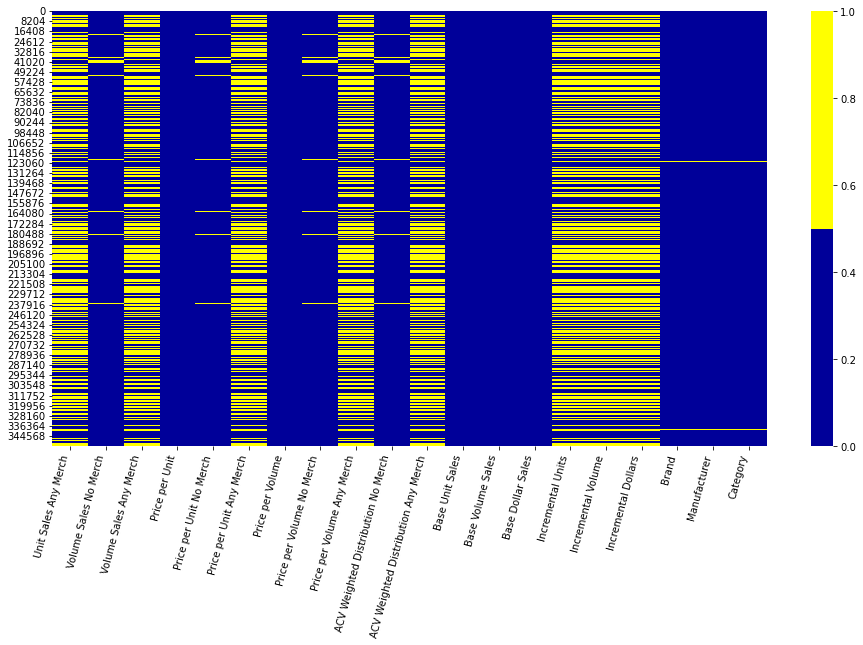

In [73]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_oil0[cols].isna(), cmap = sns.color_palette(colors), ax = ax)
plt.xticks(rotation = 75, ha='right')

In [74]:
# The Percentage of Missing Values
percent_missing = df_oil0.isnull().sum() * 100 / len(df_oil0)
missing_value_df_oil = pd.DataFrame({'number of missing': df_oil0.isnull().sum()[2],
                                            'percent_missing': percent_missing})
missing_value_df_oil

,number of missing,percent_missing
Geography,0,0.000000
Time,0,0.000000
Product,0,0.000000
Dollar Sales No Merch,0,2.238658
Dollar Sales Any Merch,0,49.842667
Unit Sales No Merch,0,2.238658
Unit Sales Any Merch,0,49.842667
Volume Sales No Merch,0,2.238658
Volume Sales Any Merch,0,49.842667
Price per Unit,0,0.000000


#### Generate Promotion Variable

In [75]:
df_oil0['Promotion'] =  df_oil0['Dollar Sales Any Merch'].apply(lambda x: 1 if x > 0 else 0)

#### Data Imputation
- Fill the missing values for `Dollar Sales No Merch`, `Unit Sales No Merch`, `Volume Sales No Merch`, `Price per Unit No Merch`, `Price per Volume No Merch`, `ACV Weighted Distribution No Merch` with 0.
- Fill the missing values for `Dollar Sales Any Merch`, `Unit Sales Any Merch`, `Volume Sales Any Merch`,  `ACV Weighted Distribution Any Merch`, `Incremental Units`, `Incremental Volume`, and `Incremental Dollars` with 0.
- Fill the missing values for `Price per Unit Any Merch ` and `Price per Volume Any Merch` with the according values in the variables for Any Merch.

In [76]:
col_list1 = ['Dollar Sales No Merch', 'Unit Sales No Merch', 'Volume Sales No Merch', 'Price per Unit No Merch', 'Price per Volume No Merch', 'ACV Weighted Distribution No Merch']
  
for col in col_list1:
    df_oil0[col].fillna(0,inplace=True)

In [77]:
col_list2 = ['Dollar Sales Any Merch', 'Unit Sales Any Merch', 'Volume Sales Any Merch', 'ACV Weighted Distribution Any Merch', 'Incremental Units', 'Incremental Volume', 'Incremental Dollars']
  
for col in col_list2:
    df_oil0[col].fillna(0,inplace=True)

In [78]:
col_list3 = ['Price per Unit Any Merch', 'Price per Volume Any Merch']

for i in range(len(df_oil0)):
    if df_oil0[col_list3[0]][i] == np.nan:
        df_oil0[col_list3[0]][i] = df_oil0['Price per Unit No Merch'][i]
    
for i in range(len(df_oil0)):
    if df_oil0[col_list3[1]][i] == np.nan:
        df_oil0[col_list3[1]][i] = df_oil0['Price per Volume No Merch'][i]

#### Generate Numeric Variable -- Total Sales

In [79]:
df_oil0['Total Sales'] = df_oil0['Base Dollar Sales'] + df_oil0['Incremental Dollars']

#### Check Null Value Again -- In %

In [80]:
# The Percentage of Missing Values
percent_missing2 = df_oil0.isnull().sum() * 100 / len(df_oil0)
missing_value_df_oil2 = pd.DataFrame({'number of missing': df_oil0.isnull().sum()[2],
                                            'percent_missing': percent_missing2})
missing_value_df_oil2

,number of missing,percent_missing
Geography,0,0.000000
Time,0,0.000000
Product,0,0.000000
Dollar Sales No Merch,0,0.000000
Dollar Sales Any Merch,0,0.000000
Unit Sales No Merch,0,0.000000
Unit Sales Any Merch,0,0.000000
Volume Sales No Merch,0,0.000000
Volume Sales Any Merch,0,0.000000
Price per Unit,0,0.000000


#### Check Duplicated Rows

In [81]:
df_oil0[df_oil0.duplicated(keep = False)]

,Geography,Time,Product,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,Brand,Manufacturer,Category,Promotion,Total Sales


#### Change Time Format

In [82]:
df_oil0['Date'] = df_oil0['Time'].apply(lambda x: re.split("Week Ending ", x)[1])

In [83]:
df_oil0['Date'] = pd.to_datetime(df_oil0['Date'])
df_oil0['Year'] = df_oil0['Date'].apply(lambda x : x.year)
df_oil0['Month'] = df_oil0['Date'].apply(lambda x : x.month)
df_oil0['Day'] = df_oil0['Date'].apply(lambda x : x.day)

In [84]:
df_oil0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352756 entries, 0 to 352755
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Geography                            352756 non-null  object        
 1   Time                                 352756 non-null  object        
 2   Product                              352756 non-null  object        
 3   Dollar Sales No Merch                352756 non-null  float64       
 4   Dollar Sales Any Merch               352756 non-null  float64       
 5   Unit Sales No Merch                  352756 non-null  float64       
 6   Unit Sales Any Merch                 352756 non-null  float64       
 7   Volume Sales No Merch                352756 non-null  float64       
 8   Volume Sales Any Merch               352756 non-null  float64       
 9   Price per Unit                       352756 non-null  float64       
 

#### Export Cleaned Dataset

In [85]:
df_oil0.to_csv('df_oil.csv', sep=',')

#### **Categorical Variable -- Category**

In [86]:
df_oil = df_oil0.copy()

In [87]:
# Check Unique Sub-Category Names
df_oil['Category'].unique()

array(['COOKING & SALAD OILS', nan], dtype=object)

#### **Categorical Variable -- Geography**

In [88]:
df_oil['Geography'].unique()

array(['Total US - Multi Outlet + Conv',
       'California - IRI Standard - Multi Outlet + Conv',
       'Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Mid-South - IRI Standard - Multi Outlet + Conv',
       'Northeast - IRI Standard - Multi Outlet + Conv',
       'Plains - IRI Standard - Multi Outlet + Conv',
       'South Central - IRI Standard - Multi Outlet + Conv',
       'Southeast - IRI Standard - Multi Outlet + Conv',
       'West - IRI Standard - Multi Outlet + Conv'], dtype=object)

In [89]:
df_oil_US = df_oil[df_oil['Geography'] == 'Total US - Multi Outlet + Conv']

In [90]:
df_oil_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95329 entries, 0 to 95328
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Geography                            95329 non-null  object        
 1   Time                                 95329 non-null  object        
 2   Product                              95329 non-null  object        
 3   Dollar Sales No Merch                95329 non-null  float64       
 4   Dollar Sales Any Merch               95329 non-null  float64       
 5   Unit Sales No Merch                  95329 non-null  float64       
 6   Unit Sales Any Merch                 95329 non-null  float64       
 7   Volume Sales No Merch                95329 non-null  float64       
 8   Volume Sales Any Merch               95329 non-null  float64       
 9   Price per Unit                       95329 non-null  float64       
 10  Price per 

In [91]:
df_oil_US.to_csv('df_oil_US.csv', sep=',')

In [92]:
df_oil_reg = df_oil[df_oil['Geography'] != 'Total US - Multi Outlet + Conv']

In [93]:
df_oil_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257427 entries, 95329 to 352755
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Geography                            257427 non-null  object        
 1   Time                                 257427 non-null  object        
 2   Product                              257427 non-null  object        
 3   Dollar Sales No Merch                257427 non-null  float64       
 4   Dollar Sales Any Merch               257427 non-null  float64       
 5   Unit Sales No Merch                  257427 non-null  float64       
 6   Unit Sales Any Merch                 257427 non-null  float64       
 7   Volume Sales No Merch                257427 non-null  float64       
 8   Volume Sales Any Merch               257427 non-null  float64       
 9   Price per Unit                       257427 non-null  float64     

In [94]:
df_oil_reg.to_csv('df_oil_reg.csv', sep=',')

### 3. Cooking Spray Data

#### Merge Cooking Spray Data with Cooking Spray Attribute Data

In [95]:
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)
    
df_spray0 = pd.merge(df_spray, df_spray_attr, how='left', left_on = 'Product', right_on = 'Brand', suffixes = ('', '_y'))
df_spray0.head().transpose()

drop_y(df_spray0)

In [96]:
df_spray0.head().transpose()

,0,1,2,3,4
Geography,Total US - Multi Outlet + Conv,Total US - Multi Outlet + Conv,Total US - Multi Outlet + Conv,Total US - Multi Outlet + Conv,Total US - Multi Outlet + Conv
Time,Week Ending 01-14-18,Week Ending 01-14-18,Week Ending 01-14-18,Week Ending 01-14-18,Week Ending 01-14-18
Product,WINONA PURE COOKING SPRAYS,MAZOLA COOKING SPRAYS,FRATELLI MANTOVA COOKING SPRAYS,GRAND AROMA COOKING SPRAYS,GLICKS COOKING SPRAYS
Dollar Sales No Merch,24650.088234,38022.422834,5019.152981,2504.180539,86.360844
Dollar Sales Any Merch,51.08,744.39085,639.542858,294.9466,NaN
Unit Sales No Merch,7697.139651,17155.765767,660.018313,334.698915,27.374427
Unit Sales Any Merch,18.0,325.989418,100.416811,47.186823,NaN
Volume Sales No Merch,2405.356141,5361.176802,338.733227,167.349457,10.193628
Volume Sales Any Merch,5.625,101.871693,53.351452,23.593412,NaN
Price per Unit,3.201649,2.217558,7.441392,7.32975,3.1548


#### Checking Missing Values

In [97]:
cols = df_spray0.columns[6:]
colors = ['#000099', '#ffff00'] #yellow is missing, blue is not missing

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0.5, 0, 'Unit Sales Any Merch'),
  Text(1.5, 0, 'Volume Sales No Merch'),
  Text(2.5, 0, 'Volume Sales Any Merch'),
  Text(3.5, 0, 'Price per Unit'),
  Text(4.5, 0, 'Price per Unit No Merch'),
  Text(5.5, 0, 'Price per Unit Any Merch'),
  Text(6.5, 0, 'Price per Volume'),
  Text(7.5, 0, 'Price per Volume No Merch'),
  Text(8.5, 0, 'Price per Volume Any Merch'),
  Text(9.5, 0, 'ACV Weighted Distribution No Merch'),
  Text(10.5, 0, 'ACV Weighted Distribution Any Merch'),
  Text(11.5, 0, 'Base Unit Sales'),
  Text(12.5, 0, 'Base Volume Sales'),
  Text(13.5, 0, 'Base Dollar Sales'),
  Text(14.5, 0, 'Incremental Units'),
  Text(15.5, 0, 'Incremental Volume'),
  Text(16.5, 0, 'Incremental Dollars'),
  Text(17.5, 0, 'Brand'),
  Text(18.5, 0, 'Manufacturer'),
  Text(19.5, 0, 'Category')])

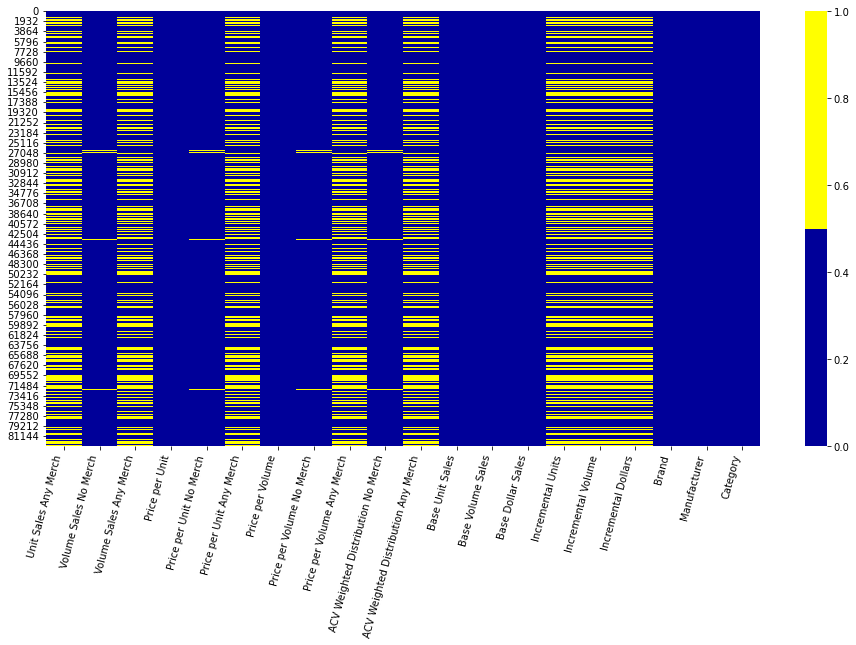

In [98]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_spray0[cols].isna(), cmap = sns.color_palette(colors), ax = ax)
plt.xticks(rotation = 75, ha='right')

In [99]:
# The Percentage of Missing Values
percent_missing = df_spray0.isnull().sum() * 100 / len(df_oil0)
missing_value_df_spray = pd.DataFrame({'number of missing': df_spray0.isnull().sum()[2],
                                            'percent_missing': percent_missing})
missing_value_df_spray

,number of missing,percent_missing
Geography,0,0.000000
Time,0,0.000000
Product,0,0.000000
Dollar Sales No Merch,0,0.220549
Dollar Sales Any Merch,0,8.170237
Unit Sales No Merch,0,0.220549
Unit Sales Any Merch,0,8.170237
Volume Sales No Merch,0,0.220549
Volume Sales Any Merch,0,8.170237
Price per Unit,0,0.000000


#### Generate Promotion Variable

In [100]:
df_spray0['Promotion'] =  df_spray0['Dollar Sales Any Merch'].apply(lambda x: 1 if x > 0 else 0)

#### Data Imputation
- Fill the missing values for `Dollar Sales No Merch`, `Unit Sales No Merch`, `Volume Sales No Merch`, `Price per Unit No Merch`, `Price per Volume No Merch`, `ACV Weighted Distribution No Merch` with 0.
- Fill the missing values for `Dollar Sales Any Merch`, `Unit Sales Any Merch`, `Volume Sales Any Merch`,  `ACV Weighted Distribution Any Merch`, `Incremental Units`, `Incremental Volume`, and `Incremental Dollars` with 0.
- Fill the missing values for `Price per Unit Any Merch ` and `Price per Volume Any Merch` with the according values in the variables for Any Merch.

In [101]:
col_list1 = ['Dollar Sales No Merch', 'Unit Sales No Merch', 'Volume Sales No Merch', 'Price per Unit No Merch', 'Price per Volume No Merch', 'ACV Weighted Distribution No Merch']
  
for col in col_list1:
    df_spray0[col].fillna(0,inplace=True)

In [102]:
col_list2 = ['Dollar Sales Any Merch', 'Unit Sales Any Merch', 'Volume Sales Any Merch', 'ACV Weighted Distribution Any Merch', 'Incremental Units', 'Incremental Volume', 'Incremental Dollars']
  
for col in col_list2:
    df_spray0[col].fillna(0,inplace=True)

In [103]:
col_list3 = ['Price per Unit Any Merch', 'Price per Volume Any Merch']

for i in range(len(df_spray0)):
    if df_spray0[col_list3[0]][i] == np.nan:
        df_spray0[col_list3[0]][i] = df_spray0['Price per Unit No Merch'][i]
    
for i in range(len(df_spray0)):
    if df_spray0[col_list3[1]][i] == np.nan:
        df_spray0[col_list3[1]][i] = df_spray0['Price per Volume No Merch'][i]

#### Generate Numeric Variable -- Total Sales

In [104]:
df_spray0['Total Sales'] = df_spray0['Base Dollar Sales'] + df_spray0['Incremental Dollars']

#### Check Null Value Again -- In %

In [105]:
# The Percentage of Missing Values
percent_missing2 = df_spray0.isnull().sum() * 100 / len(df_oil0)
missing_value_df_spray2 = pd.DataFrame({'number of missing': df_spray0.isnull().sum()[2],
                                            'percent_missing': percent_missing2})
missing_value_df_spray2

,number of missing,percent_missing
Geography,0,0.000000
Time,0,0.000000
Product,0,0.000000
Dollar Sales No Merch,0,0.000000
Dollar Sales Any Merch,0,0.000000
Unit Sales No Merch,0,0.000000
Unit Sales Any Merch,0,0.000000
Volume Sales No Merch,0,0.000000
Volume Sales Any Merch,0,0.000000
Price per Unit,0,0.000000


#### Check Duplicated Rows

In [106]:
df_spray0[df_spray0.duplicated(keep = False)]

,Geography,Time,Product,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,Brand,Manufacturer,Category,Promotion,Total Sales


#### Change Time Format

In [107]:
df_spray0['Date'] = df_spray0['Time'].apply(lambda x: re.split("Week Ending ", x)[1])

In [108]:
df_spray0['Date'] = pd.to_datetime(df_spray0['Date'])
df_spray0['Year'] = df_spray0['Date'].apply(lambda x : x.year)
df_spray0['Month'] = df_spray0['Date'].apply(lambda x : x.month)
df_spray0['Day'] = df_spray0['Date'].apply(lambda x : x.day)

In [109]:
df_spray0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83045 entries, 0 to 83044
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Geography                            83045 non-null  object        
 1   Time                                 83045 non-null  object        
 2   Product                              83045 non-null  object        
 3   Dollar Sales No Merch                83045 non-null  float64       
 4   Dollar Sales Any Merch               83045 non-null  float64       
 5   Unit Sales No Merch                  83045 non-null  float64       
 6   Unit Sales Any Merch                 83045 non-null  float64       
 7   Volume Sales No Merch                83045 non-null  float64       
 8   Volume Sales Any Merch               83045 non-null  float64       
 9   Price per Unit                       83045 non-null  float64       
 10  Price per 

#### Export Cleaned Dataset

In [110]:
df_spray0.to_csv('df_spray.csv', sep=',')

#### **Categorical Variable -- Category**

In [111]:
df_spray = df_spray0.copy()

In [112]:
# Check Unique Sub-Category Names
df_spray['Category'].unique()

array(['COOKING SPRAYS', nan], dtype=object)

#### **Categorical Variable -- Geography**

In [113]:
df_spray['Geography'].unique()

array(['Total US - Multi Outlet + Conv',
       'California - IRI Standard - Multi Outlet + Conv',
       'Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Mid-South - IRI Standard - Multi Outlet + Conv',
       'Northeast - IRI Standard - Multi Outlet + Conv',
       'Plains - IRI Standard - Multi Outlet + Conv',
       'South Central - IRI Standard - Multi Outlet + Conv',
       'Southeast - IRI Standard - Multi Outlet + Conv',
       'West - IRI Standard - Multi Outlet + Conv'], dtype=object)

In [114]:
df_spray_US = df_spray[df_spray['Geography'] == 'Total US - Multi Outlet + Conv']

In [115]:
df_spray_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12832 entries, 0 to 12831
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Geography                            12832 non-null  object        
 1   Time                                 12832 non-null  object        
 2   Product                              12832 non-null  object        
 3   Dollar Sales No Merch                12832 non-null  float64       
 4   Dollar Sales Any Merch               12832 non-null  float64       
 5   Unit Sales No Merch                  12832 non-null  float64       
 6   Unit Sales Any Merch                 12832 non-null  float64       
 7   Volume Sales No Merch                12832 non-null  float64       
 8   Volume Sales Any Merch               12832 non-null  float64       
 9   Price per Unit                       12832 non-null  float64       
 10  Price per 

In [116]:
df_spray_US.to_csv('df_spray_US.csv', sep=',')

In [117]:
df_spray_reg = df_spray[df_spray['Geography'] != 'Total US - Multi Outlet + Conv']

In [118]:
df_spray_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70213 entries, 12832 to 83044
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Geography                            70213 non-null  object        
 1   Time                                 70213 non-null  object        
 2   Product                              70213 non-null  object        
 3   Dollar Sales No Merch                70213 non-null  float64       
 4   Dollar Sales Any Merch               70213 non-null  float64       
 5   Unit Sales No Merch                  70213 non-null  float64       
 6   Unit Sales Any Merch                 70213 non-null  float64       
 7   Volume Sales No Merch                70213 non-null  float64       
 8   Volume Sales Any Merch               70213 non-null  float64       
 9   Price per Unit                       70213 non-null  float64       
 10  Price 

In [119]:
df_spray_reg.to_csv('df_spray_reg.csv', sep=',')